In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display
plt.rc('font', family='Verdana')
!pip install mglearn
import mglearn


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [15]:
print(iris_dataset['DESCR'] + "\n")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [17]:
print("Название ответов: {}".format(iris_dataset['target_names']))

Название ответов: ['setosa' 'versicolor' 'virginica']


In [20]:
print("Название признаков: {}".format(iris_dataset['feature_names']))

Название признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [25]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


In [27]:
print("Первые пять строк из массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк из массива data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [29]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [31]:
print("Форма массива target: {}".format(iris_dataset['target'].shape))

Форма массива target: (150,)


In [35]:
print("Ответы:\n{}".format(iris_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
print("Название ответов: ")
for i in range(len(iris_dataset['target_names'])):
    print("\t{} = {}".format(iris_dataset['target_names'][i], i))


Название ответов: 
	setosa = 0
	versicolor = 1
	virginica = 2


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=1)

In [57]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива Y_train: {}".format(Y_train.shape))

Форма массива X_train: (112, 4)
Форма массива Y_train: (112,)


In [59]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива Y_test: {}".format(Y_test.shape))

Форма массива X_test: (38, 4)
Форма массива Y_test: (38,)


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


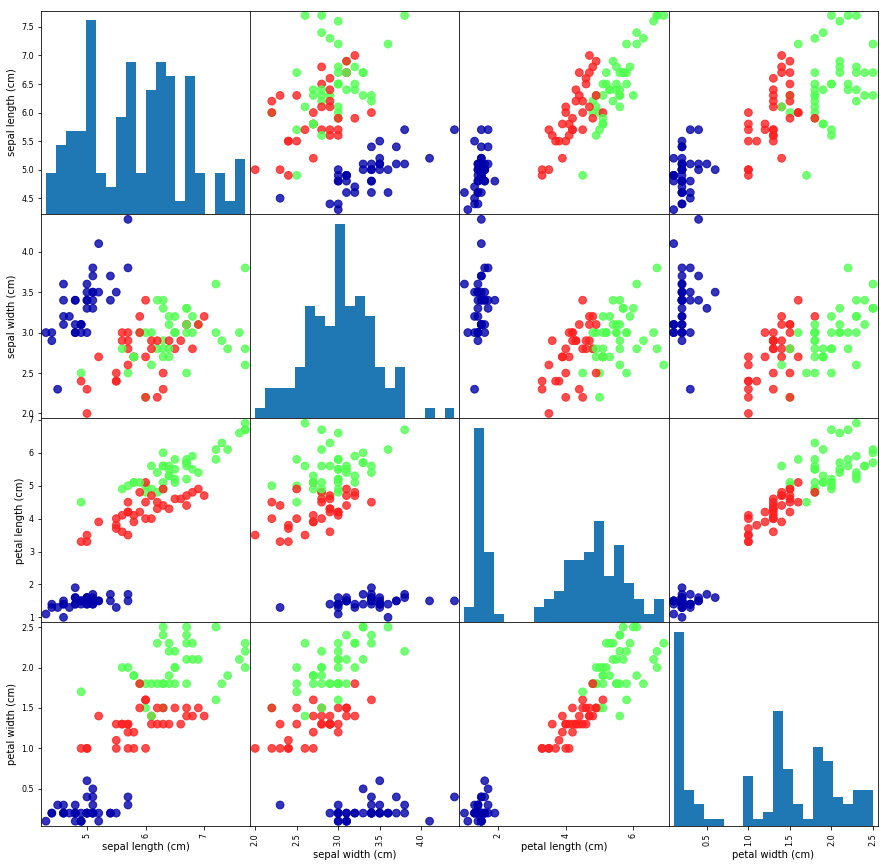

In [62]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=Y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [71]:
X_new = np.array([[5, 2.9, 1, .2]])
print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 4)


In [73]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [80]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n{}".format(iris_dataset['target_names'][y_pred]))

Прогнозы для тестового набора:
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']


In [84]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == Y_test)))

Правильность на тестовом наборе: 1.00


In [88]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, Y_test)))

Правильность на тестовом наборе: 1.00
